In [2]:
from edbo.bro import BO_express
import pandas as pd
from edbo.utils import Data

C:\Users\puddi\anaconda3\envs\edbo\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
reagents = Data(pd.read_csv('../descriptors/IA_Reagents.csv'))
catalysts = Data(pd.read_csv('../descriptors/IA_Catalyst.csv'))
solvents = Data(pd.read_csv('../descriptors/IA_Solvent.csv'))

In [3]:
reagents.data

,REAGENT_0_SMILES,REAGENT_dipole,REAGENT_atom_n,REAGENT_m_mass
0,O=C([O-])C(C)(C)C.[Cs+],10.5053,17,234.02
1,O=C([O-])C(C)(C)C.[K+],8.5745,17,140.22
2,O=C([O-])C.[Cs+],9.9259,8,191.94
3,O=C([O-])C.[K+],8.0945,8,98.14


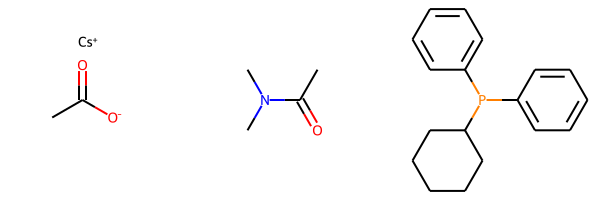

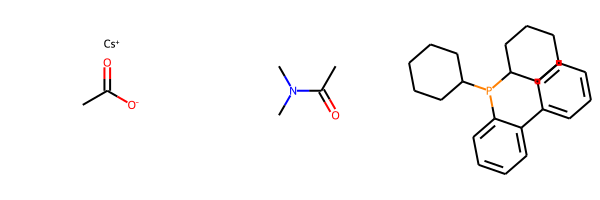

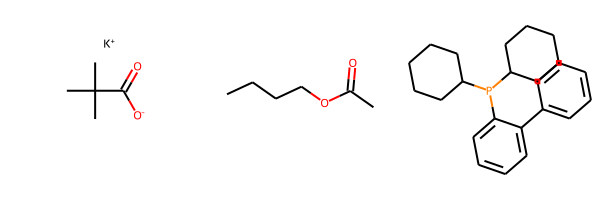

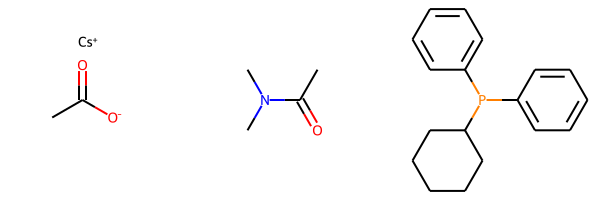

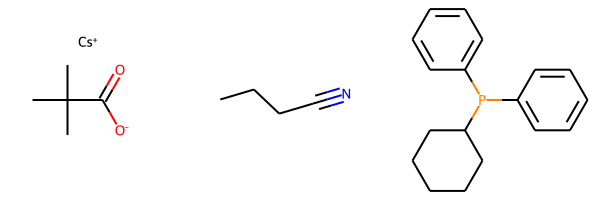

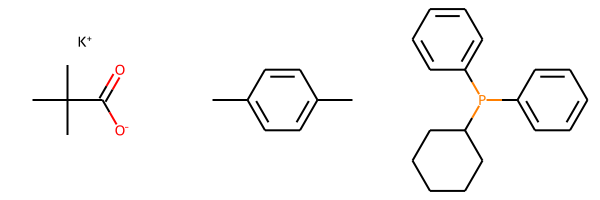

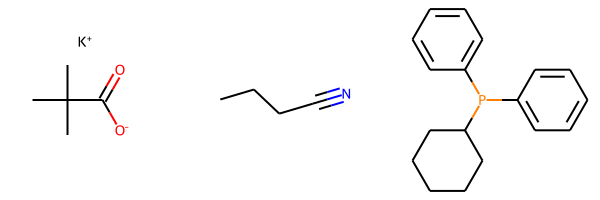

,REAGENT_0_SMILES_index,SOLVENT_0_SMILES_index,CATALYST_0_SMILES_index,solvent_conc_index,temperature_index
144,O=C([O-])C.[Cs+],CC(N(C)C)=O,P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3,263.157900,120
154,O=C([O-])C.[Cs+],CC(N(C)C)=O,C1(P(C2CCCCC2)C3CCCCC3)=CC=CC=C1C4=CC=CC=C4,263.157900,105
121,O=C([O-])C(C)(C)C.[K+],CCCCOC(C)=O,C1(P(C2CCCCC2)C3CCCCC3)=CC=CC=C1C4=CC=CC=C4,150.000000,105
150,O=C([O-])C.[Cs+],CC(N(C)C)=O,P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3,98.039215,120
20,O=C([O-])C(C)(C)C.[Cs+],CCCC#N,P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3,263.157900,90
131,O=C([O-])C(C)(C)C.[K+],CC1=CC=C(C)C=C1,P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3,150.000000,90
94,O=C([O-])C(C)(C)C.[K+],CCCC#N,P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3,150.000000,105


In [4]:
# modified Shields and el. example code
from edbo.bro import BO_express
    
reaction_components={
    'reagent':'DFT',
    'solvent': 'DFT',
    'catalyst_one':'DFT',
    'solvent_conc': [263.1579, 150, 98.039215],
    'temperature': [120, 105, 90]}

encoding={'solvent_conc':'numeric',
          'temperature':'numeric'}

dft = {'reagent':reagents.data,                               
       'solvent':solvents.data,
       'catalyst_one':catalysts.data}    

bo = BO_express(reaction_components,                                
                encoding=encoding,                          
                descriptor_matrices=dft,                    
                acquisition_function='EI',                  
                init_method='PAM',                        
                batch_size=7,                               
                target='yield')  


bo.init_seq.visualize = False
bo.init_sample()                    
bo.get_experiments(structures=True)

In [5]:
bo.export_proposed('init.csv') 

In [6]:
bo.save()

In [7]:
from edbo.bro import BO_express

bo = BO_express()
bo.load()

In [10]:
bo.add_results('results/init.csv')

In [11]:
bo.run()

,REAGENT_dipole,REAGENT_atom_n,SOLVENT_dipole,SOLVENT_n_atom,CATALYST_dipole,solvent_conc,temperature
204,0.759665,0.0,0.000000,0.75,1.0,0.0,1.0
258,0.000000,0.0,0.507461,1.00,1.0,0.0,1.0
168,0.759665,0.0,1.000000,0.00,1.0,0.0,1.0
42,1.000000,1.0,0.507461,1.00,1.0,0.0,1.0
186,0.759665,0.0,0.507461,1.00,1.0,0.0,1.0
188,0.759665,0.0,0.507461,1.00,1.0,0.0,0.0
180,0.759665,0.0,0.507461,1.00,1.0,1.0,1.0


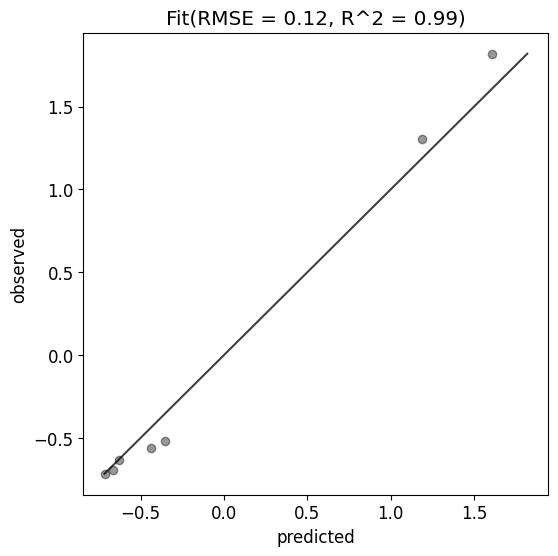

In [12]:
bo.model.regression()

In [14]:
bo.get_experiments()

,REAGENT_0_SMILES_index,SOLVENT_0_SMILES_index,CATALYST_0_SMILES_index,solvent_conc_index,temperature_index
204,O=C([O-])C.[Cs+],CC1=CC=C(C)C=C1,P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3,98.039215,120
258,O=C([O-])C.[K+],CCCCOC(C)=O,P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3,98.039215,120
168,O=C([O-])C.[Cs+],CCCC#N,P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3,98.039215,120
42,O=C([O-])C(C)(C)C.[Cs+],CCCCOC(C)=O,P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3,98.039215,120
186,O=C([O-])C.[Cs+],CCCCOC(C)=O,P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3,98.039215,120
188,O=C([O-])C.[Cs+],CCCCOC(C)=O,P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3,98.039215,90
180,O=C([O-])C.[Cs+],CCCCOC(C)=O,P(C1=CC=CC=C1)(C2CCCCC2)C3=CC=CC=C3,263.157900,120


In [11]:
bo.export_proposed('round0.csv')

In [12]:
#modified from Shields and al. example code
def workflow(export_path):
    bo.plot_convergence()
    bo.model.regression()
    bo.export_proposed(export_path)

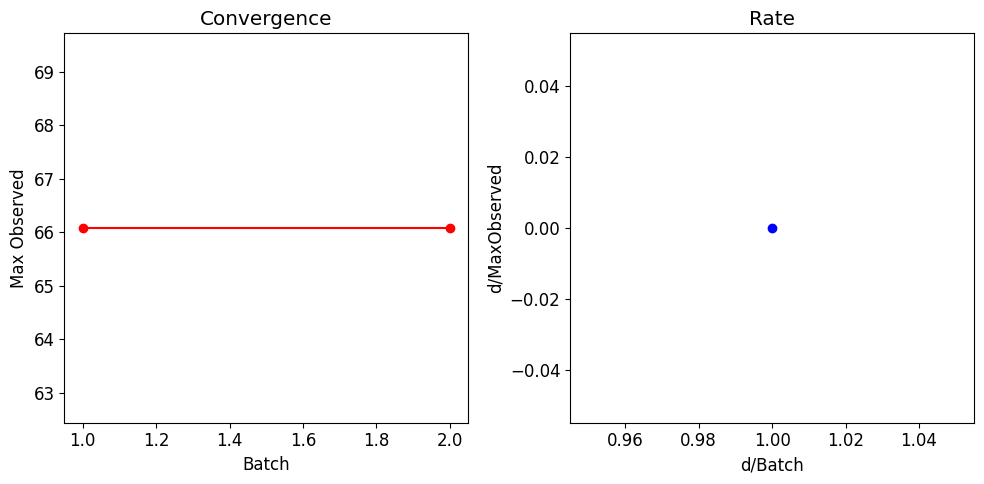

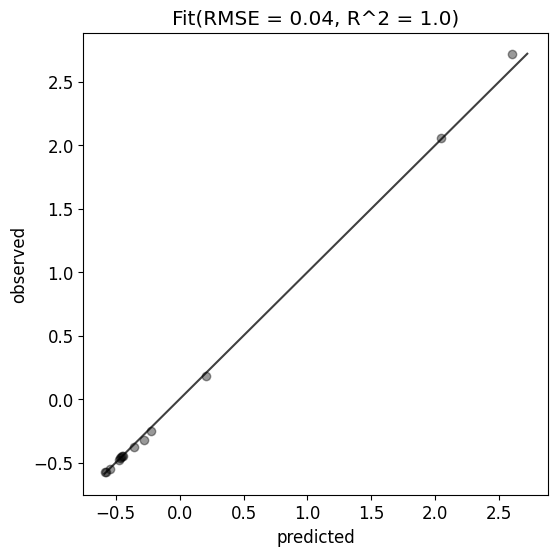

In [13]:
bo.add_results('results/round0.csv')  
bo.run()
workflow('round1.csv')

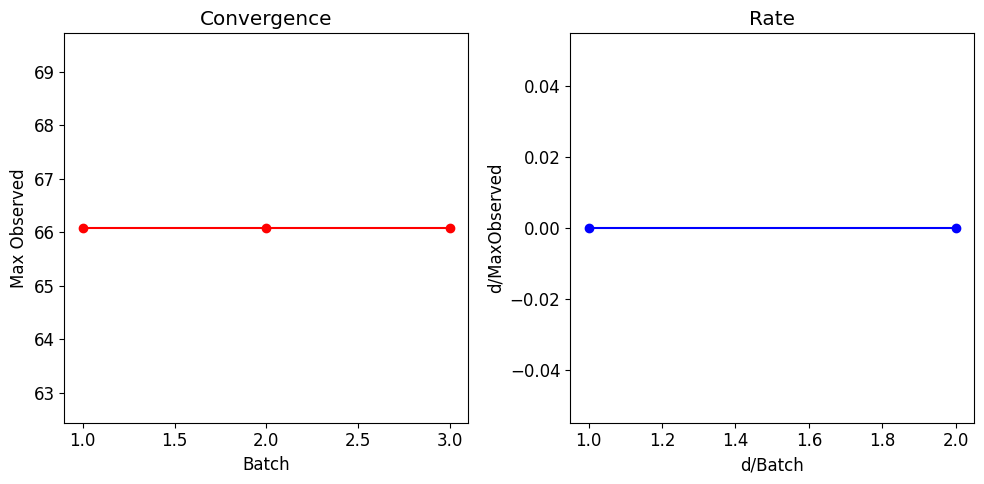

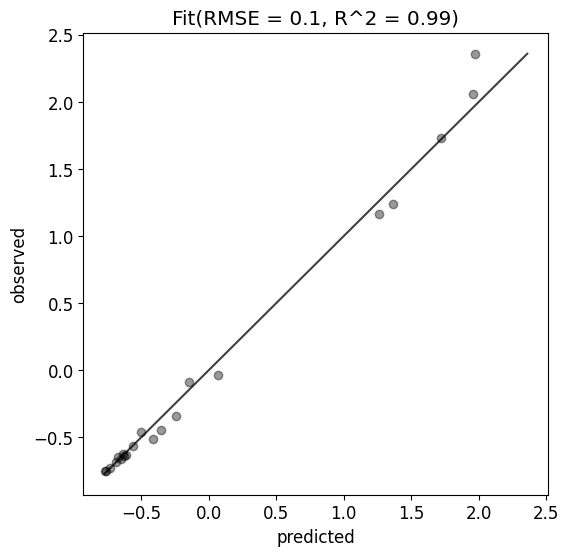

In [14]:
bo.add_results('results/round1.csv')
bo.run()
workflow('round2.csv')   

In [ ]:
bo.add_results('results/round2.csv')
bo.run()
workflow('round3.csv') 

In [ ]:
bo.add_results('results/round3.csv')
bo.run()
workflow('round4.csv') 

In [ ]:
bo.add_results('results/round4.csv')
bo.run()
workflow('round5.csv') 